<a href="https://colab.research.google.com/github/mostafa-ja/Anomaly-detection/blob/main/LSTM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import json
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [9]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    cosine_similarity = dot_product / (norm1 * norm2)
    return cosine_similarity


In [10]:
with open('/content/hdfs_event2semantic_vec.json') as f:
    # Step1-1 open file
    gdp_list = json.load(f)
    value = list(gdp_list.values())

In [11]:
print(len(value))
print(len(value[0]))

29
300


In [12]:
components = None
pca = PCA(n_components = 20) # n_components can not be greater than 29 , because we have 29 data and if they are compeletely independent , we could have 29D, same as one hot encoding
# perform PCA on the scaled data
pca_result = pca.fit_transform(value)

# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print(sum(pca.explained_variance_ratio_ * 100)) #the percentage of variance for 20D


Variances (Percentage):
[26.38436577 11.54957801  8.87619262  8.09854493  5.83096291  4.95880394
  4.05582561  3.81095343  3.24716904  2.76424442  2.52277546  2.38701665
  1.98277494  1.86786663  1.6366585   1.51299209  1.47744943  1.28605957
  1.2501469   0.99433261]
96.49471344390082


In [13]:
print(pca_result.shape)

(29, 20)


In [14]:
with open('/content/hdfs_event2semantic_vec.json') as f:
    # Step1-1 open file
    gdp_list = json.load(f)
    value = list(gdp_list.values())

    # Step1-2 PCA: Dimensionality reduction to 20-dimensional data

    estimator = PCA(n_components=20)
    pca_result = estimator.fit_transform(value)

    # Step1-3 PPA: De-averaged
    ppa_result = []
    result = pca_result - np.mean(pca_result)
    pca = PCA(n_components=20)
    pca_result = pca.fit_transform(result)
    U = pca.components_
    for i, x in enumerate(result):
        for u in U[0:7]:
            x = x - np.dot(u.transpose(), x) * u
        ppa_result.append(list(x))
    ppa_result = np.array(ppa_result)


In [17]:
similarity = cosine_similarity(value[0], value[1])
print("Cosine Similarity:", similarity)


Cosine Similarity: 0.27651085126256936


In [18]:
similarity = cosine_similarity(pca_result[0], pca_result[1])
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.21585695356706583


In [15]:
similarity = cosine_similarity(ppa_result[0], ppa_result[1])
print("Cosine Similarity:", similarity) # we get lower score , it means that we separate diffrent templates

Cosine Similarity: 0.1741783979116341


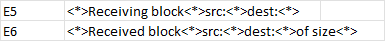

In [42]:
cosine_similarity(value[22], value[23])

0.6125285006859826

In [ ]:
cosine_similarity(value[4], value[5])

In [22]:
for i in range(len(value)):
  similarity = cosine_similarity(value[0], value[i])
  print("Cosine Similarity", i, ":", similarity)


Cosine Similarity 0 : 0.9999999999999998
Cosine Similarity 1 : 0.27651085126256936
Cosine Similarity 2 : 0.18122023805649887
Cosine Similarity 3 : 0.3267673760215494
Cosine Similarity 4 : 0.19405120213133703
Cosine Similarity 5 : 0.20316513371303502
Cosine Similarity 6 : 0.2639310231083585
Cosine Similarity 7 : 0.15637567678739486
Cosine Similarity 8 : 0.24820938538048493
Cosine Similarity 9 : 0.1561963943455993
Cosine Similarity 10 : 0.2372774115291913
Cosine Similarity 11 : 0.29712514758161357
Cosine Similarity 12 : 0.2278927913226847
Cosine Similarity 13 : 0.28872930529168567
Cosine Similarity 14 : 0.4392014716690768
Cosine Similarity 15 : 0.13692091522222488
Cosine Similarity 16 : 0.25919821759075473
Cosine Similarity 17 : 0.36363383721916986
Cosine Similarity 18 : 0.28679718478954275
Cosine Similarity 19 : 0.36286394372749203
Cosine Similarity 20 : 0.3932855801000819
Cosine Similarity 21 : 0.381467123264216
Cosine Similarity 22 : 0.5077544939704627
Cosine Similarity 23 : 0.5305253

In [21]:
for i in range(len(value)):
  similarity = cosine_similarity(ppa_result[0], ppa_result[i])
  print("Cosine Similarity", i, ":", similarity)

Cosine Similarity 0 : 1.0
Cosine Similarity 1 : 0.1741783979116341
Cosine Similarity 2 : 0.0493952189889063
Cosine Similarity 3 : -0.12110205166171253
Cosine Similarity 4 : 0.4949030223096774
Cosine Similarity 5 : -0.36309477407223495
Cosine Similarity 6 : -0.15579346821526416
Cosine Similarity 7 : 0.15441210513430262
Cosine Similarity 8 : -0.39983119924253396
Cosine Similarity 9 : 0.17218881653353296
Cosine Similarity 10 : 0.27673970945399423
Cosine Similarity 11 : -0.003356796468733433
Cosine Similarity 12 : -0.02221830077151306
Cosine Similarity 13 : 0.058041876946014086
Cosine Similarity 14 : -0.05381434457666614
Cosine Similarity 15 : -0.026950592332469072
Cosine Similarity 16 : -0.5163487074011823
Cosine Similarity 17 : -0.03393731379219344
Cosine Similarity 18 : -0.024216832845201562
Cosine Similarity 19 : -0.31041876009404873
Cosine Similarity 20 : -0.3879588455974878
Cosine Similarity 21 : 0.06479137940119888
Cosine Similarity 22 : -0.2168865550818318
Cosine Similarity 23 : 0.

In [65]:
# Load the data from the JSON file
with open('/content/templates2vec.json', 'r') as file:
    vector_list = json.load(file)

# Convert the list of lists back to a list of numpy arrays
templates2vec = [np.array(vector) for vector in vector_list]

In [66]:
print(len(templates2vec))
print(len(templates2vec[0]))

30
384


In [67]:
 # Step1-2 PCA: Dimensionality reduction to 20-dimensional data

estimator = PCA(n_components=20)
pca_result = estimator.fit_transform(templates2vec)

# Step1-3 PPA: De-averaged
ppa_result = []
result = pca_result - np.mean(pca_result)
pca = PCA(n_components=20)
pca_result = pca.fit_transform(result)
U = pca.components_
for i, x in enumerate(result):
    for u in U[0:7]:
        x = x - np.dot(u.transpose(), x) * u
    ppa_result.append(list(x))
ppa_result = np.array(ppa_result)


In [68]:
# print the explained variances
print("Variances (Percentage):")
print(estimator.explained_variance_ratio_ * 100)
print(sum(estimator.explained_variance_ratio_ * 100)) #the percentage of variance for 20D

Variances (Percentage):
[17.19343452  9.78053891  7.66650029  7.13861271  6.40005176  5.85359304
  4.88185956  4.61380362  4.21747056  3.44720373  3.27457676  2.94803634
  2.62977877  2.51702516  2.36034375  1.9441829   1.9068179   1.77823564
  1.56182657  1.36230143]
93.47619390949846


In [69]:
print(len(ppa_result))
print(len(ppa_result[0]))

30
20


In [23]:
# download datasets
!wget 'https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_train'
!wget 'https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_test_normal'
!wget 'https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_test_abnormal'

--2023-07-20 13:40:45--  https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257875 (252K) [text/plain]
Saving to: ‘hdfs_train’

hdfs_train          100%[===================>] 251.83K  --.-KB/s    in 0.03s   

2023-07-20 13:40:45 (7.34 MB/s) - ‘hdfs_train’ saved [257875/257875]

--2023-07-20 13:40:45--  https://raw.githubusercontent.com/donglee-afar/logdeep/master/data/hdfs/hdfs_test_normal
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29284282 (28M) 

In [24]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader
import os
import numpy as np

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
names = ['hdfs_train','hdfs_test_normal','hdfs_test_abnormal']
templates = set()

for name in names:
  with open('/content/' + name, 'r') as f:
          for row in f:
            for temp in row.split():
              templates.add(temp)

print(templates)

{'6', '27', '28', '21', '5', '20', '8', '18', '16', '2', '13', '25', '10', '7', '17', '1', '19', '9', '12', '4', '22', '23', '3', '26', '24', '11', '14', '15'}


In [35]:
sorted([int(num) for num in templates])


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [70]:
name = 'hdfs_train'
window_size = 10
num_sessions = 0
inputs = []
outputs = []

with open('/content/' + name, 'r') as f:
        for row in f:
            num_sessions += 1
            line = [ppa_result[int(i) - 1] for i in row.strip().split()] # we substract by one from templates index for starting from zero
            for i in range(len(line) - window_size):
                inputs.append(line[i:i + window_size])
                outputs.append(line[i + window_size])

print('Number of sessions({}): {}'.format(name, num_sessions))
print('Number of seqs({}): {}'.format(name, len(inputs)))
dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float), torch.tensor(outputs,dtype=torch.float ))

Number of sessions(hdfs_train): 4855
Number of seqs(hdfs_train): 46575


In [71]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))  # out.shape : [batch_size, sequence_length, hidden_size]
        out = self.fc(out[:, -1, :]) #The : before , -1, : indicates that we want to include all elements along the first dimension (batch dimension). -1 represents the index of the last element along the second dimension (sequence length). : after , -1 indicates that we want to include all elements along the third dimension (hidden size)
        return out

In [86]:
input_size = 20
num_layers = 2
hidden_size = 64
num_classes = 20
batch_size = 2048
num_epochs = 300

In [94]:
model = Model(input_size, hidden_size, num_layers, num_classes).to(device)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
# Train the model
start_time = time.time()
total_step = len(dataloader)
for epoch in range(num_epochs):  # Loop over the dataset multiple times
    train_loss = 0
    for step, (seq, label) in enumerate(dataloader):
        # Forward pass
        seq = seq.clone().detach().view(-1, window_size, input_size).to(device)
        output = model(seq)
        loss = criterion(output, label.to(device))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print('Epoch [{}/{}], train_loss: {:.4f}'.format(epoch + 1, num_epochs, train_loss / total_step))
elapsed_time = time.time() - start_time
print('elapsed_time: {:.3f}s'.format(elapsed_time))
print('Finished Training')

Epoch [1/300], train_loss: 0.0093
Epoch [2/300], train_loss: 0.0069
Epoch [3/300], train_loss: 0.0059
Epoch [4/300], train_loss: 0.0047
